In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


72 47


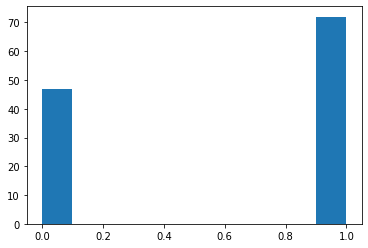

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
os.chdir('/content/gdrive/My Drive/botlagunta/blood_profiling_code/new')
df = pd.read_csv("combined.csv")
mr_no = df["MR_no"]
df3 = np.array(df)
inter = df3[:,1:9] 

kmeans = KMeans(n_clusters=2, random_state=0).fit(inter)
kmeans.cluster_centers_
inter2 = list(kmeans.predict(inter))
classA_strength = sum(inter2)
classB_strength = len(inter2) - sum(inter2)
print(classA_strength,classB_strength)

x,y,z=plt.hist(inter2)

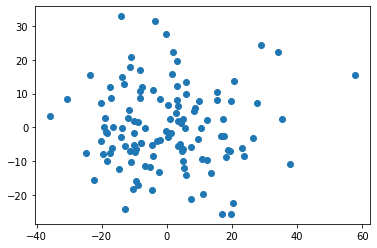

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(inter)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
x = principalDf["principal component 1"]
y = principalDf["principal component 2"]
x,y=list(x),list(y)
plt.scatter(x,y)
plt.show()

In [0]:
df2 = pd.read_csv("mr_no_categorical.csv")
mr_meta=df2["Metastasis"]
inter3 = list(set(mr_meta))
inter3 = inter3[1:]
# for i in inter3:
#  if str(i) == "nan":
#     print("missed a no.")
mr_no = list(mr_no)
metas = list(set(inter3).intersection(mr_no))
label=[]
for no in mr_no:
  if no in metas:
    label.append(1)
  else:
    label.append(0)
df["label"] = label
# df.to_csv("complete.csv")

In [6]:
df

,MR_no,Haemoglobin,Packed Cell Volume,Red Cell Count,WBC Count,No of Cell Counted,Neutrophils,Lymphocyte,Monocyte,label
0,MR1701463,140,0.44,5.48,7.33,100,62,28,7,1
1,MR1704665,129,0.41,4.70,5.66,100,53,30,15,1
2,MR1704360,116,0.37,4.55,10.25,100,62,29,7,1
3,MR1703121,138,0.42,5.13,8.79,100,58,26,8,1
4,MR1705071,132,0.42,4.89,7.94,100,68,28,4,0
...,...,...,...,...,...,...,...,...,...,...
114,MR1801399,130,0.39,4.43,7.02,100,48,40,8,1
115,MR1800016,125,0.39,4.27,8.79,100,67,27,5,1
116,MR1801290,138,0.42,5.02,10.62,100,80,14,5,1
117,MR1800031,132,0.42,5.00,8.60,100,60,24,9,1


In [0]:
# normal range
# Haemoglobin 120.0 - 150.0
# Packed Cell Volume 0.36 - 0.46
# Red Cell Count 3.8 - 4.8
# WBC Count 4.0 - 10.0
# Neutrophils 40.0 - 80.0
# Lymphocyte 20.0 - 40.0
# Monocyte 2.0 - 6.0

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import random
from sklearn.metrics import confusion_matrix
df=pd.read_csv("complete.csv")
df["Haemoglobin"] = round(df["Haemoglobin"]/150.0,2)
df["Neutrophils"] = round(df["Neutrophils"] /80, 2)
df["Lymphocyte"] = round(df["Lymphocyte"]/40,2)
df["Monocyte"] = round(df["Monocyte"]/6,2) 
df["No of Cell Counted"] = round(df["No of Cell Counted"]/100,2)
# df=df.sample(frac=1)
df_inter=df[["Haemoglobin"	,"Packed Cell Volume"	,"Red Cell Count",	"WBC Count",	"Neutrophils"	,"Lymphocyte",	"Monocyte"]]
Xfinal=np.array((df_inter))
xfinal=[]
for i in range(len(Xfinal)):
    xfinal.append(list(Xfinal[i]))

# print(len(xfinal),len(y))
Y=df["label"]
Y=np.array(Y)
Y=list(Y)
# print(len(xfinal),len(Y))
for i in range(80):
  inter = [round(random.uniform(120.0 , 150.0)/150.0,2),round(random.uniform(0.36 ,0.46),2),round(random.uniform(3.8 ,4.8)/4.8,2),
          round(random.uniform(4.0 , 10.0)/10.0,2),round(random.uniform(40.0 , 80.0)/80.0,2),round(random.uniform(20.0 , 40.0)/40.0,2),
          round(random.uniform(2.0 , 6.0),2)]
  xfinal.append(inter)
  Y.append(0)
# print(len(Xfinal))
# print(len(xfinal),len(Y))

df_inter = pd.DataFrame(xfinal)
df_inter["label"] = Y
df_inter=df_inter.sample(frac=1)
# print(df_inter)
xfinal = np.array(df_inter)
Xfinal = xfinal[1:,:7]
Y = xfinal[1:,7:8]
# Y = []
 
# print(len(Xfinal),len(Y))
# print(df_inter)
# print(len(Xfinal))
split_factor=int(len(Y)*.7)
X_Train=np.array(Xfinal)[:split_factor]
Y_Train=Y[:split_factor]
X_Test=Xfinal[split_factor:]
Y_Test=Y[split_factor:]

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_Train,Y_Train)
Y_Predicted=neigh.predict(X_Test)
Y_Predicted=list(Y_Predicted)
Y_Test=list(Y_Test)
counter=0
for i in range (len(Y_Predicted)):
    if (Y_Predicted[i]==Y_Test[i]):
        counter=counter+1
accuracy=counter/len(Y_Predicted)
print(classification_report(Y_Test, Y_Predicted))
print(confusion_matrix(Y_Test, Y_Predicted))


              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        33
         1.0       0.81      0.81      0.81        27

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

[[28  5]
 [ 5 22]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


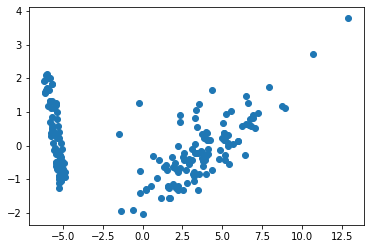

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(xfinal[1:,:7])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
x = principalDf["principal component 1"]
y = principalDf["principal component 2"]
x,y=list(x),list(y)
plt.scatter(x,y)
plt.show()